In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part 1: Linear Regression

### Load data

For the first part we will use a simple dataset that is available on SKlearn. You can go through the [documentation](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) for more details about the. Our job is to use the Boston Housing Dataset to try and predict the price of a house given various attributes such as crime rate in the area, size etc.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


### Explore Data

#### Check if any cleaning is required

Note that this is a fairly clean dataset, regardless, it is always a good idea to see if there are any missing values and if the data types are all valid inputs for regression analysis. 

This may or may not lead to any results, but in any Data Science project it is a good idea to minimize assumptions and be sure of what you are doing. There isn't a need to overthink this, just make sure there are no surprises in the data.

In [41]:
# Checking Validity of Data Types
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [42]:
# Checking if there are any missing values present in the DataSet
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Find out important features

Before any features are used in Linear Regression, checking for collinearity is essential. While again, this is less essential in some cases, we want to reduce computation time while still have the highest possible accuracy.

Again, note that there is no right answer to this, you will be graded on methodology and on what you plan to do with the features. In the end what matters is having a low mean squared error, and you can come back to this part again and again if you feel adding or removing a certain feature would make your model better.

Hint: There is one very common way of checking for collinearity, if you are able to quickly and efficiently visualize correlations between all variables, it would allow you to analyize this part in an easier way. Check out the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in Seaborn

In [4]:
corr = data.corr() # Code to get correlation matrix from data

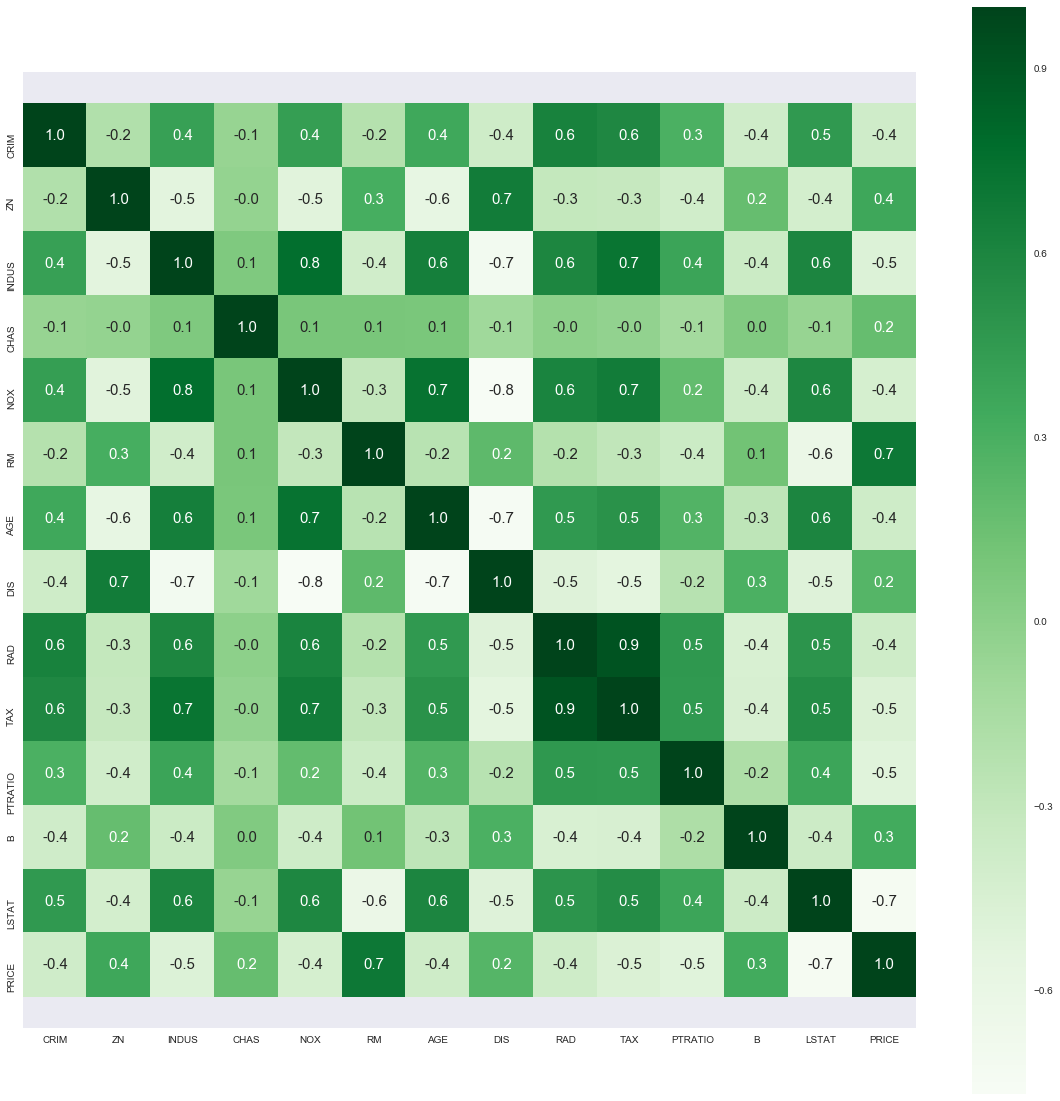

In [5]:
# The above correlation matrix can be passed directly to sns.heatmap
# This is one way of visualizing a Confusion Matrix
# Feel free to change this if you don't agree with this implementation

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### If there are any features that should dropped, do so below, and justify your decision

In [6]:
data = data.drop(columns = ['TAX'])

### Linear Regression

Here you will be making the SKLearn Linear Regression class. Most of the skeleton code is provided, you just have to convert the mathematical equations you have learnt in class into code. The coding in this part is very small, and ideal solutions can be done in just a few lines per function. If you take the shortcut and try to copy the solution, you will lose out on important learning. You can make helper functions if you wish. The Tutorial Notebooks can help you here - but even they don't contain the *exact and ideal* solution. 

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. You have covered these in class as well, and there are plenty of online resources. The following links should help you out, but refrain from copying from them directly, **they don't contain the exact solution that can be applied to this skeleton code**

[Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d): Should give you a very good primer on vectorization

[Vectorized Implementation Cheat Sheet](https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181): Can be used to infer some vectorized operations

[Loss Function with Code](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/) take this with a grain of salt. The absolute value derivative can lead to a division by 0 if $Y - Y_{pred} = 0$

[np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) can help with implementing the derivatives

**Note: Make sure you deal with exploding weights or division by zeros.** This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative**

In [7]:
# This is a Linear Regression class you will be implemented
# It will work similar to how SKLearn functions work
class LinearRegression():
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
#       You can use this as a sample
        return np.mean((Y - Y_pred) ** 2)

### IMPLEMENT THIS FUNCTION
    @staticmethod
    def mean_abs_loss(Y, Y_pred):
        return np.mean(np.absolute(Y-Y_pred))
    
### IMPLEMENT THIS FUNCTION
    def mean_huber_loss(self, Y_pred, Y):
        '''
        Implement Mean Huber Loss. self.huber_alpha will allow
        you to access the Huber Alpha value passed to the model
        '''
        alpha = self.huber_alpha
        return np.mean(np.where(np.absolute(Y-Y_pred) < alpha, (0.5)*(Y-Y_pred)**2 , alpha * (np.absolute(Y-Y_pred)) - (alpha/2)))

    @staticmethod
    def der_squared_loss(X, Y, Y_pred):
####### You can use this as a sample
        return  (Y_pred-Y) / float(len(X))
        
    @staticmethod
    def der_abs_loss(X, Y, Y_pred):
        '''np.where could prove handy here'''
        temp = np.where((np.absolute(Y-Y_pred) != 0), (Y_pred - Y)/(np.absolute(Y - Y_pred), 0))
        return temp / float(len(X))
        
    def der_huber_loss(self, X, Y, Y_pred):
        '''np.where could prove handy here'''
        alpha = self.huber_alpha
        greater = np.where(Y_pred >= Y + alpha, alpha,0)
        lesser = np.where(Y_pred <= Y - alpha, alpha,0)
        hub_less = np.where(np.absolute(Y-Y_pred) < alpha, Y-Y_pred,0)
        return (greater - lesser - hub_less) / float(len(X))
        
    def __init__(self, fit_intercept=True, 
                    normalize=False, loss_func= 'mse', huber_alpha=1.0,
                    max_iter=1000, learning_rate = 0.1, tol=0.001):
        '''
            This function initializes all of the variables of this class
            Pay close attention to them and try to figure out what each 
            of them mean and how to use them in the functions below
        '''
        self.weights_ = None
        self.bias_ = None
        self.max_iter_ = max_iter
        self.fit_intercept_ = fit_intercept
        self.learning_rate_ = learning_rate
        self.tol_ = tol
        self.huber_alpha = huber_alpha
        self.loss_func_ = loss_func
        self.loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_abs_loss,
            'huber': self.mean_huber_loss
        }
        self.der_dict = {
            'mse': self.der_squared_loss,
            'abs': self.der_abs_loss,
            'huber': self.der_huber_loss
        }

    def _init_weights(self, num_features):
        self.weights_ = np.random.normal(size=(num_features,1))

#   Here we won't be using an analytical solution, but rather gradient descent
#   This is so it is easier to incorporate regularization
    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be of the same length"
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        self._init_weights(X.shape[1])

        old_loss = np.inf
        converged = False
        for i in range(self.max_iter_):
#           Write code to get prediction
            Y_pred = X@self.weights_

########### loss functions are stored in a dictionary 
########### this saves up on many if conditions
            loss = self.loss_dict[self.loss_func_](Y, Y_pred)
########### To break when the difference in losses is very low
            if np.abs(loss - old_loss) < self.tol_:
                converged = True
                break
            old_loss = loss

########### derivative functions are also stored in a dictionary
            loss_der = self.der_dict[self.loss_func_](X, Y, Y_pred)

#           Write code to Update weights
            self.weights_ -= self.learning_rate_ * (np.transpose(X)@loss_der)
#       To check if for loop broke in the if statement or just reached max iterations
        if converged:
            print("Model Converged")
        else:
            print("Warning: Max iterations reached, model did not converge")
            
### Used to predict a Y, given an X
    def predict(self, X):
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        Y_pred =  X@self.weights_
        return Y_pred

    def get_coefficients(self):
        return self.weights_
    
    

### Applying Linear Regression to dataset

You will run into many problems such as exploding weights, division by zero. This StandardScaler will fix a lot of those problems. Read up on how and why it is used.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
cols = []
for x in data:
    cols.append(x)
arr = np.array(cols)
arr

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype='<U7')

In [10]:
Y = data[['PRICE']].to_numpy()
X = data[arr].to_numpy()
# We have to convert the dataframes to numpy for our implementation

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


In [11]:
Regressor = LinearRegression(loss_func='huber')

In [12]:
Regressor.fit(X, Y)

Model Converged


### Evaluating Linear Regression

Some starter code is provided here so you guys know how to make the graphs - now it is your job to decide how to use the train and test sets to figure out if the model is good or not. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Make predictions and calculate the Residuals from those predictions
Y_train_pred = Regressor.predict(X_train)
Y_test_pred = Regressor.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred


print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))


The Mean Squared Error on train set is: 0.0687253459526065
The Absolute Error on train set is: 0.1997587747899398
The Mean Squared Error on test set is: 0.05788341159860502
The Absolute Error on test set is: 0.19098998223293692


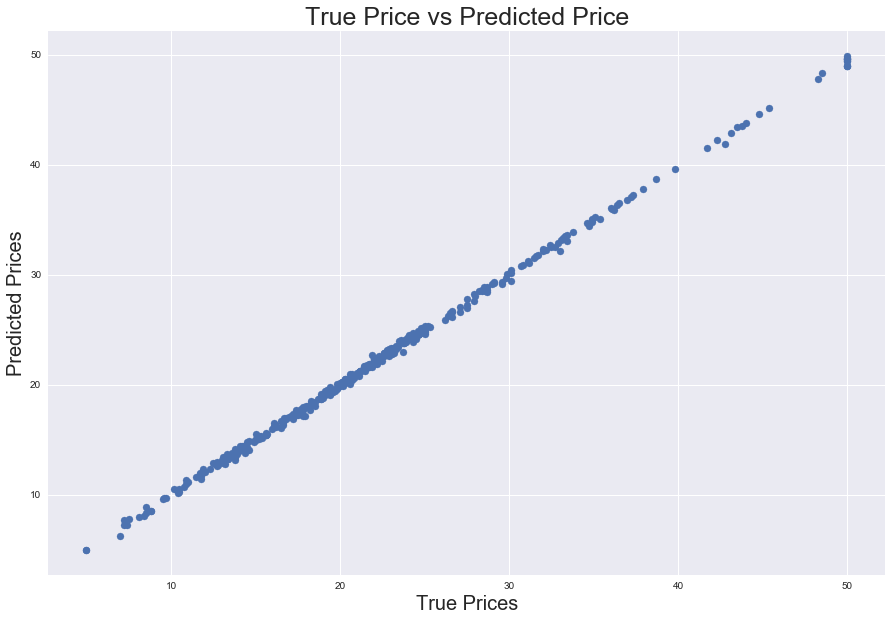

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

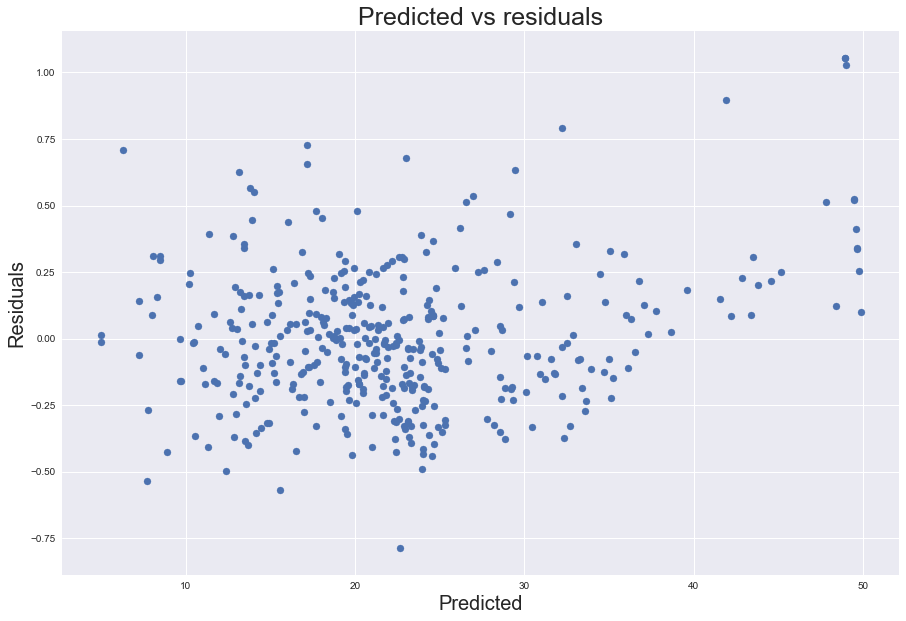

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()

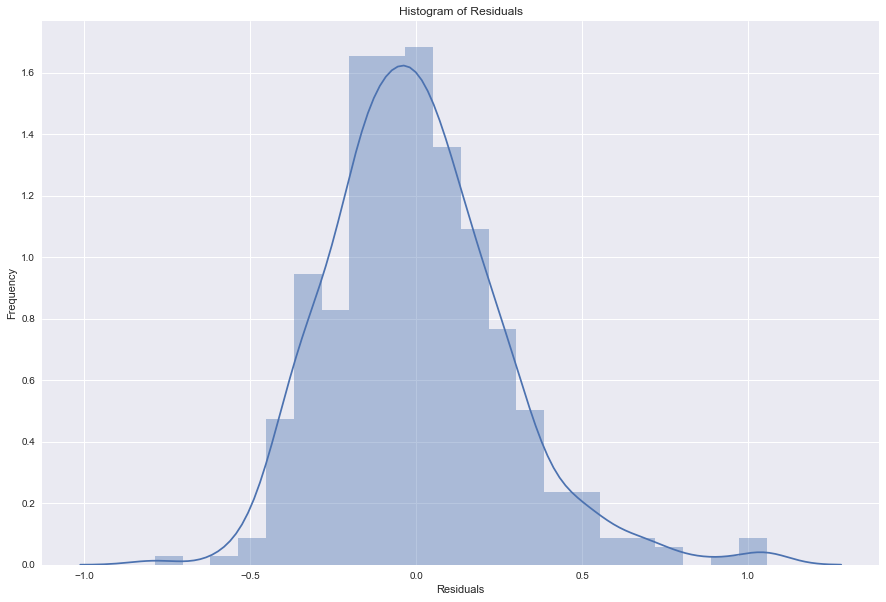

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(train_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

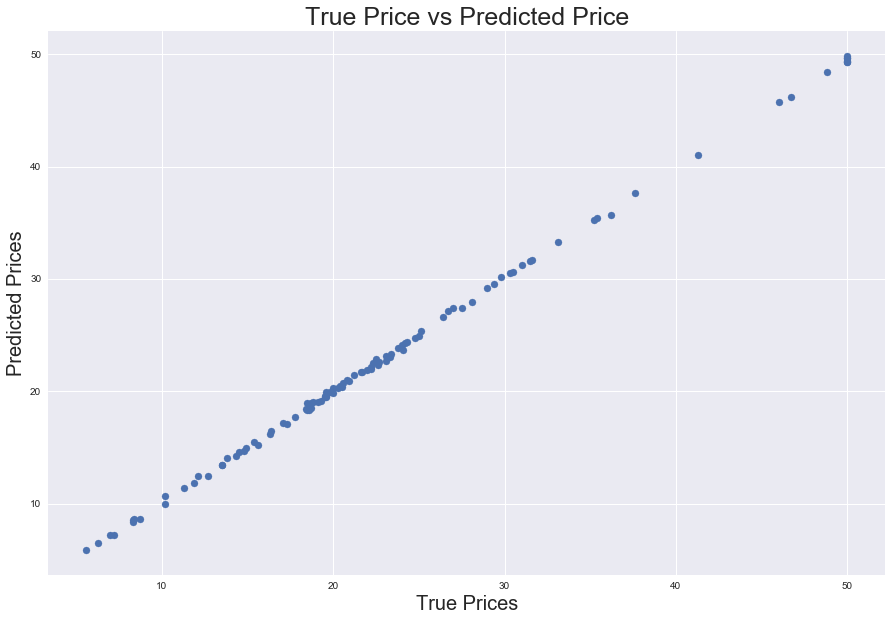

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

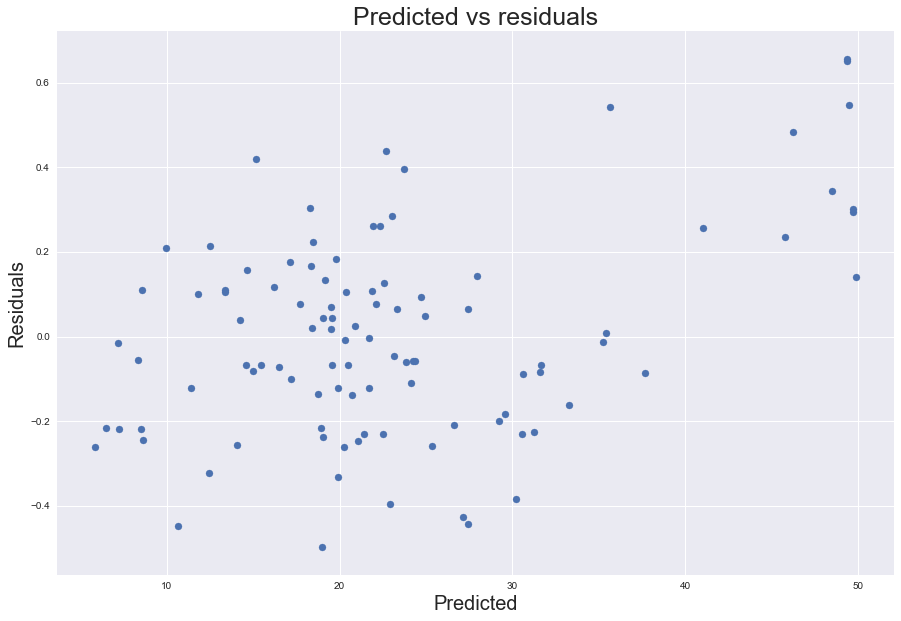

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()

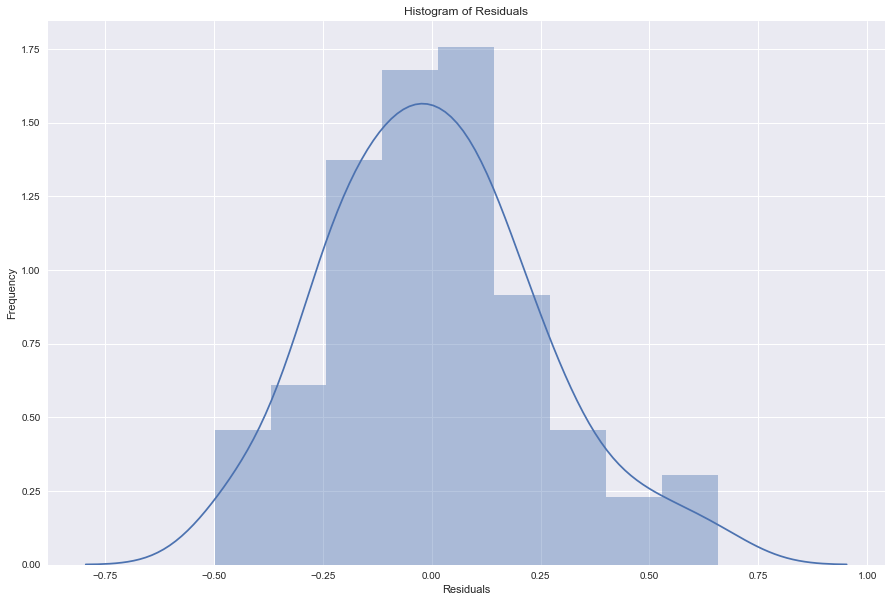

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Do you think there are any issues with the model? Are there any values or patterns seen in the previous graphs? 

In [21]:
# If you think any other graphs are necessary please make them here

**Ans:** There are no issues with the model. The histogram peaks at zero which means that the majority of the residual is zero.
         This in turn means that most of the points are correctly plotted.

### Using L1 Regularization and L2 Regularization

Here you'll use [L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) and [L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) from SKLearn to implement the regression. Use similar evaluation metrics as before to figure out which model has performed better. You can also use the ML Tutorial notebooks for help.

In [22]:
from sklearn.linear_model import LassoCV, RidgeCV

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [23]:
L1_regressor = LassoCV()
L1_regressor

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [24]:
L2_regressor = RidgeCV()
L2_regressor

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

# L1

In [25]:
# Fit both your regressors
L1_regressor.fit(X,Y)


Y_train_pred = L1_regressor.predict(X_train)
Y_test_pred = L1_regressor.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set using L1 is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set using L1 is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set using L1 is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set using L1 is:", 
      mean_absolute_error(Y_test, Y_test_pred))



E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The Mean Squared Error on train set using L1 is: 7.665230311669605e-05
The Absolute Error on train set using L1 is: 0.006368060501701943
The Mean Squared Error on test set using L1 is: 0.0001151839701555019
The Absolute Error on test set using L1 is: 0.007752848174842359


TRAIN SET



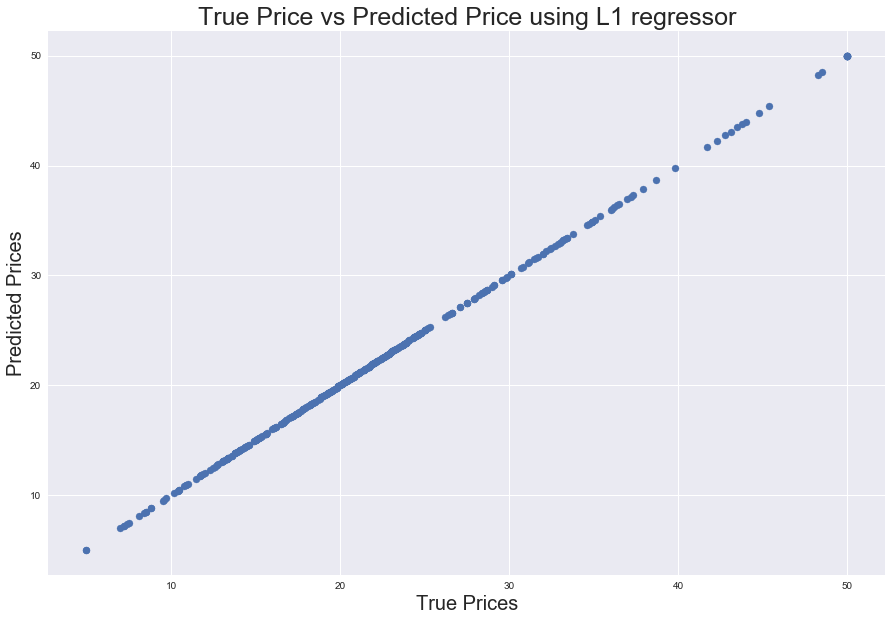

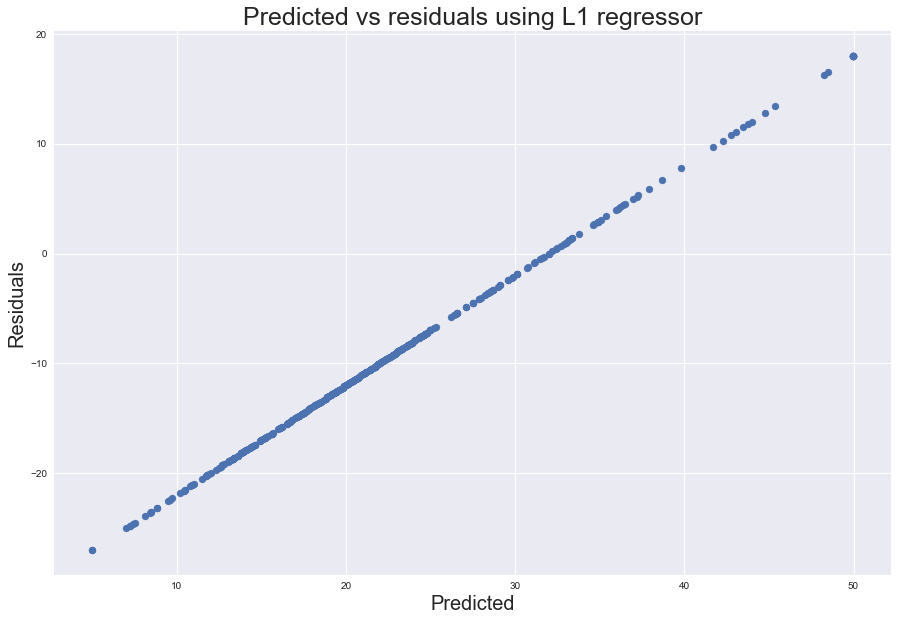

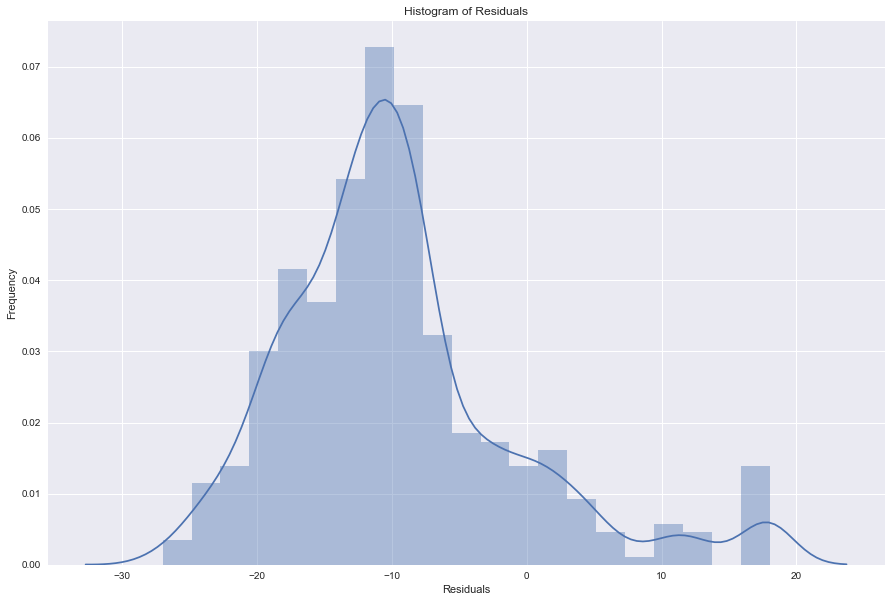

TEST SET



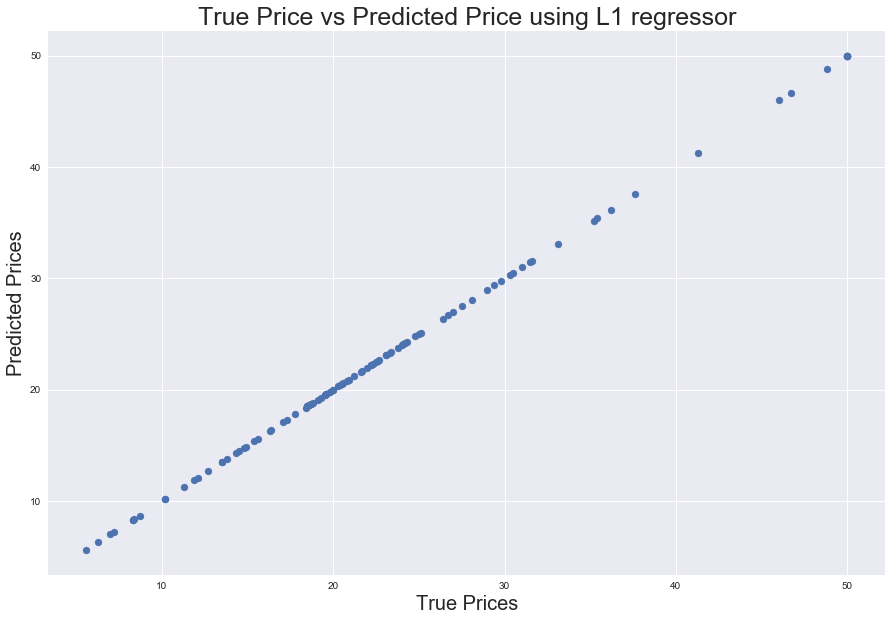

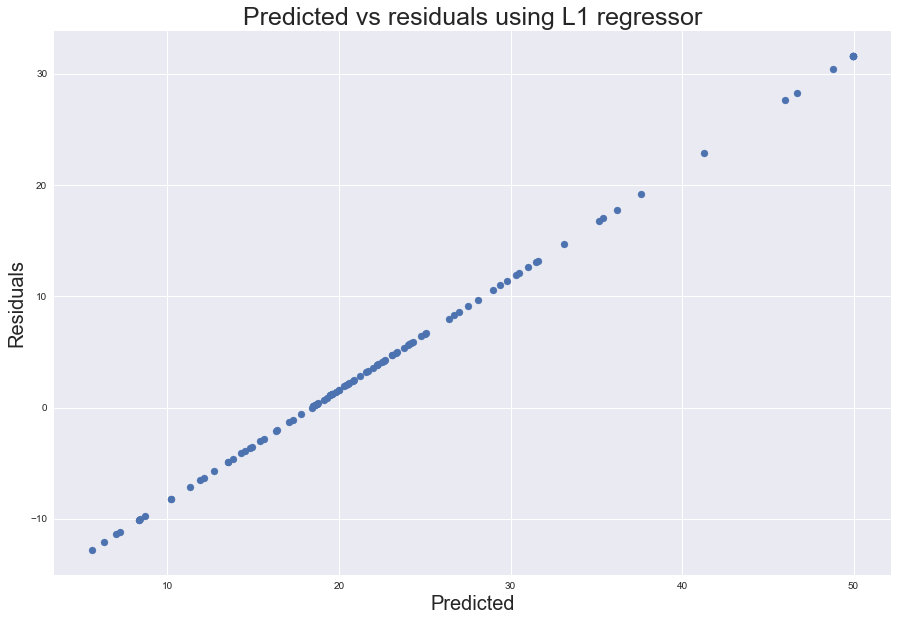

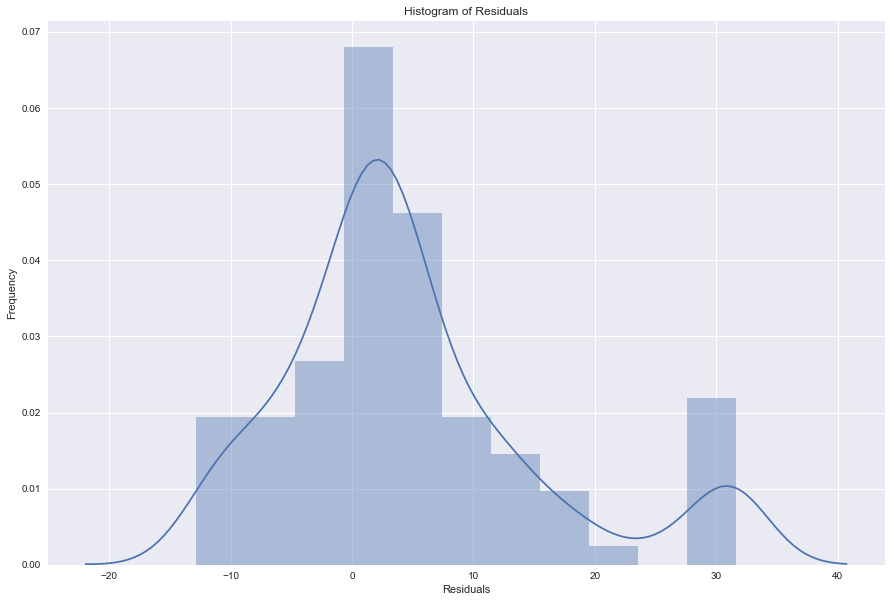

In [26]:
# Use some of the graphs and metrics given above to evaluate your model
print('TRAIN SET')
print()

plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price using L1 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals[:,0])
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals using L1 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
sns.distplot(train_residuals[:,0])
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

print('TEST SET')
print()

plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price using L1 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals[:,0])
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals using L1 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
sns.distplot(test_residuals[:,0])
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# L2

In [27]:
L2_regressor.fit(X,Y)
Y_train_pred = L2_regressor.predict(X_train)
Y_test_pred = L2_regressor.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set using L2 is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set using L2 is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set using L2 is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set using L2 is:", 
      mean_absolute_error(Y_test, Y_test_pred))


The Mean Squared Error on train set using L2 is: 1.2404609509682987e-05
The Absolute Error on train set using L2 is: 0.00246239246226559
The Mean Squared Error on test set using L2 is: 1.2443508260755846e-05
The Absolute Error on test set using L2 is: 0.0024877162452042025


TRAIN SET



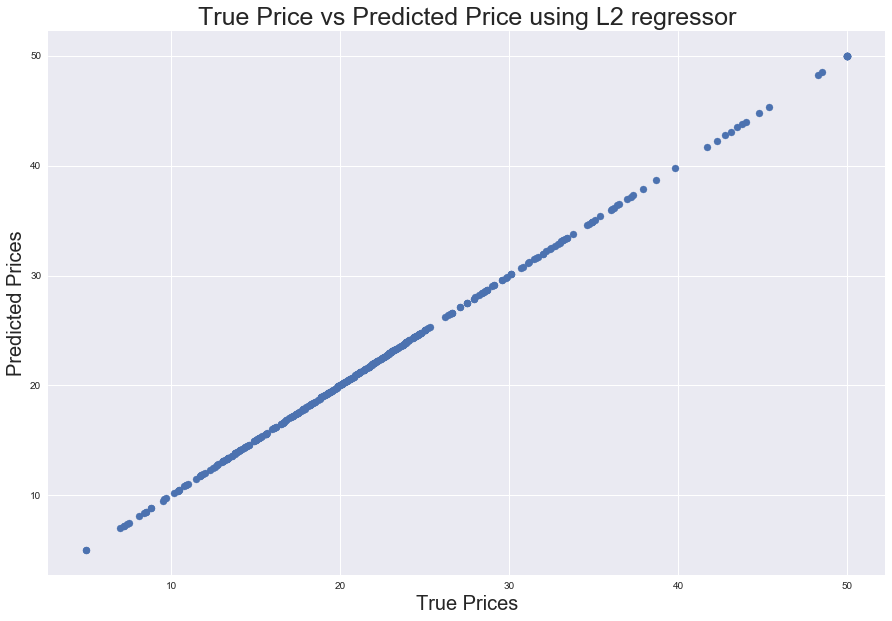

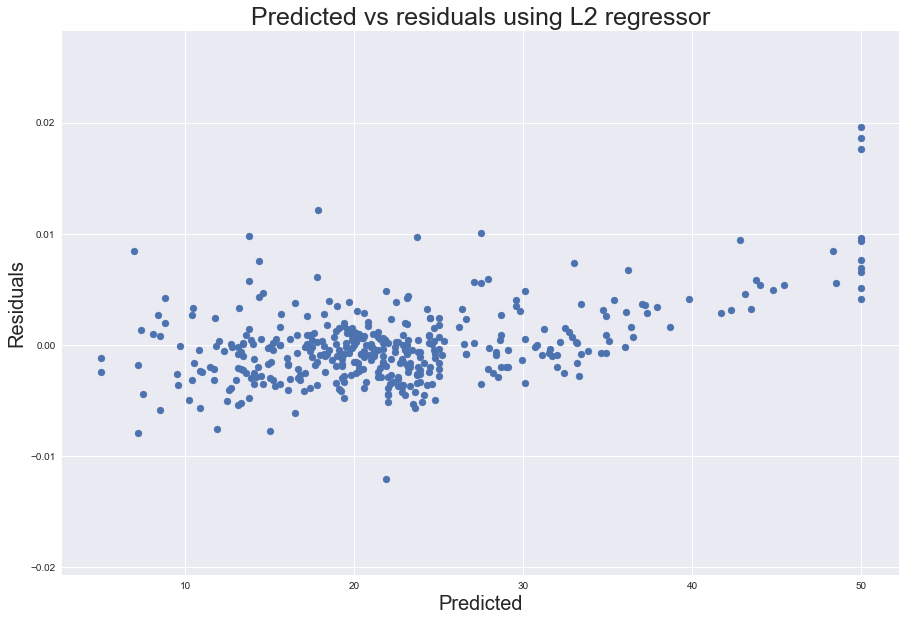

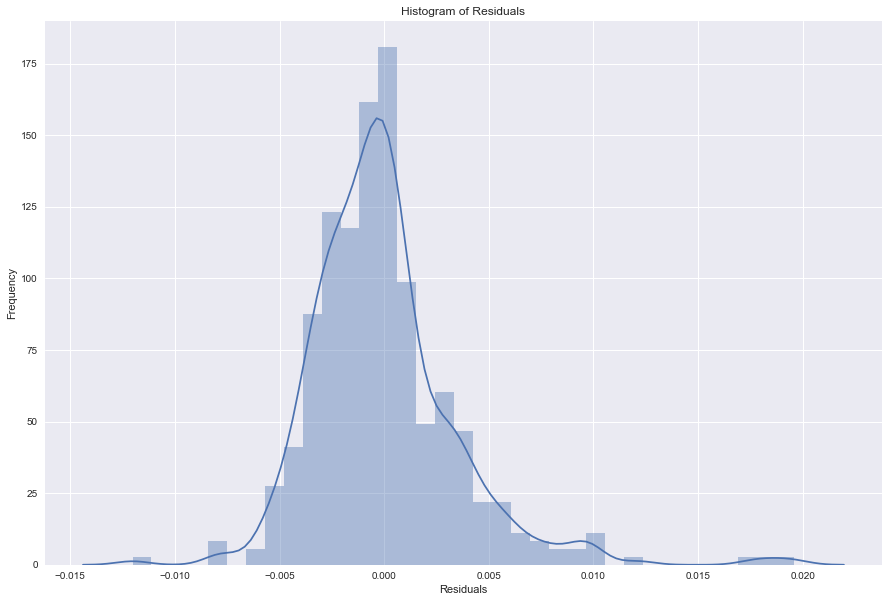

TEST SET



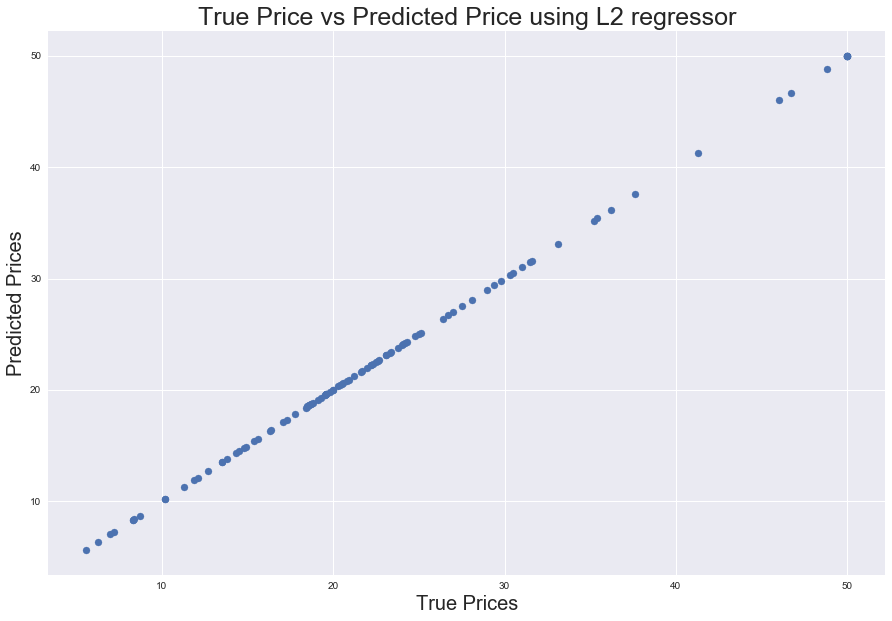

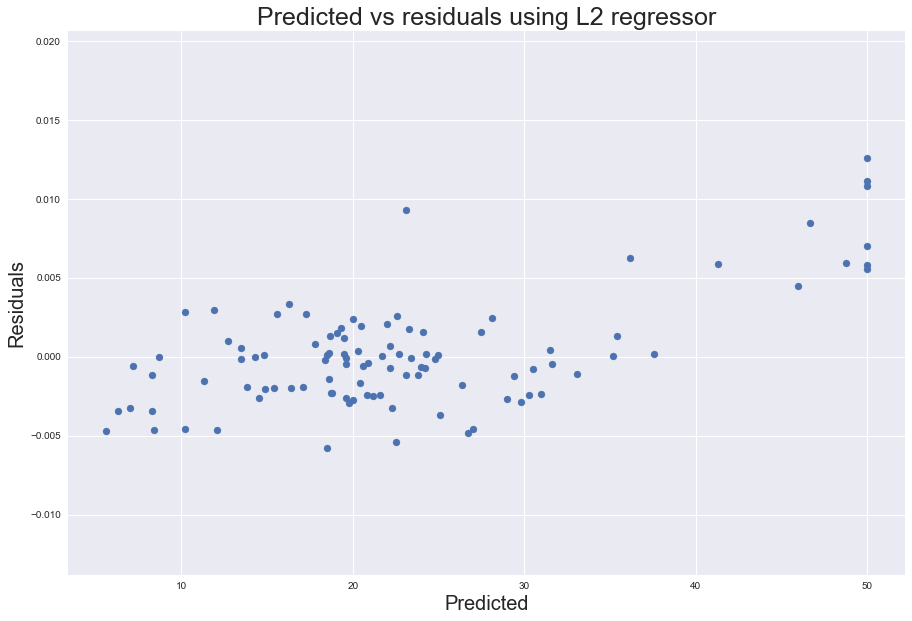

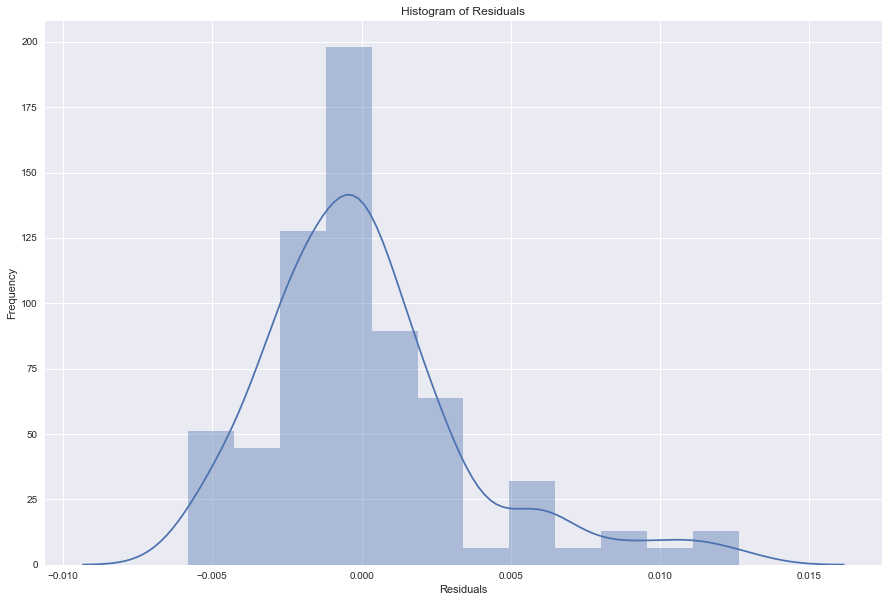

In [28]:
print('TRAIN SET')
print()

plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price using L2 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals using L2 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
sns.distplot(train_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

print('TEST SET')
print()

plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price using L2 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals using L2 regressor", size=25)
plt.show()

plt.figure(figsize=(15,10))
sns.distplot(test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


## Descriptive Questions

#### Question 1: Which model performed better? Why do you say it was better?

**Ans:** L2 performed a bit better because its histogram shows the residual closer to zero, however the difference is very small.

#### Question 2

Suppose we estimate the regression coefficients in a linear regression model by minimizing

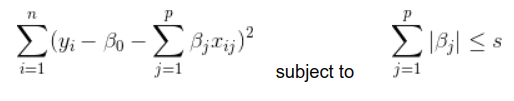

for a particular value of s. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**Ans:**

#### Question 3:
**As, we increase s from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance

**Ans:** a) (iv. Steady decrease). As s increases, the βj coefficient becomes less restricted so the neative sum will increase.

b) (ii. Initial decrease, and  then starts to  increase in a U shape). As s increases, the βj coefficient becomes less restricted and so the model is becomes more flexible.

c) (iii.Steady increase).  As s increases, the βj coefficient becomes less restricted and so the model is becomes more flexible and the variance increases as the bias decreases.

#### Question 4:

Suppose we estimate the regression coefficients in a linear regression model by minimizing

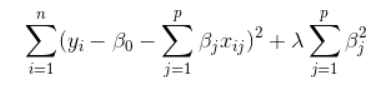

for a particular value of 𝛌. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


#### Question 5:

**As, we increase  𝛌 from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance


a) (iii. Steady increase). As 𝛌 increases, the βj coefficient becomes more restricted and so the model  becomes less flexible.

b) (ii. Initial decrease, and then starts to increase in a U shape), the βj coefficient becomes more restricted and so the model  becomes less flexible.

c) (iv. Steady decrease). As 𝛌 increases, the βj coefficient becomes more restricted and so the model  becomes less flexible.

## Part 2: Logistic Regression
Here you will be working on a classification problem from a dataset that we load from sklearn. Logistic Regression uses almost the same algorithm as Linear Regression with Gradient Descent, but the final output has a Sigmoid (Or a Softmax) *Activation Function* applied to it. Don't worry if you do not understand what this means, all you need to know is converts a continuous output into a Probability Distribution between 0 and 1.

[This link](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) will teach you everything you need to know about Logistic Regression and applying it to this problem below.


**The Problem:** Given a piece of text, you want to classify it into one of four categories: 
1. Alternate-Atheism 
2. Religious - Christian 
3. Computer-Graphics
4. Scientific-Medicine

You will have to feature engineer the raw input into a more suitable input for logistic regression

### Dataset Loading

In [29]:
from sklearn.datasets import fetch_20newsgroups

In [30]:
# Only four categories are loaded to keep the dataset size manageable
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
dataset = fetch_20newsgroups(subset='all', categories=categories)
target_names = dataset.target_names

X = dataset.data
Y = dataset.target
print("X is of length:", len(X), '\n')
print("All labels are:", np.unique(Y))
print("This label corresponds to:", target_names[Y[0]])

X is of length: 3759 

All labels are: [0 1 2 3]
This label corresponds to: sci.med


In [31]:
print("First datapoint:", X[0])

First datapoint: From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: "CAN'T BREATHE"
Article-I.D.: pitt.19440
Reply-To: geb@cs.pitt.edu (Gordon Banks)
Organization: Univ. of Pittsburgh Computer Science
Lines: 23

In article <1993Mar29.204003.26952@tijc02.uucp> pjs269@tijc02.uucp (Paul Schmidt) writes:
>I think it is important to verify all procedures with proper studies to
>show their worthiness and risk.  I just read an interesting tidbit that 
>80% of the medical treatments are unproven and not based on scientific 
>fact.  For example, many treatments of prostate cancer are unproven and
>the treatment may be more dangerous than the disease (according to the
>article I read.)

Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does ha

### Feature Engineering + Preprocessing

Your best friend is the [Scikit-Learn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). YOu can use to carry out the feature extraction. It has an in-built feature for n-gram vectorization as well. Do check out the documentation to figure out how to use simple Bag of Words and N-Gram vectorization. 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Using Bag of Words Representation
Firstly we converted it into a vectorizer in such a way that the stopwords were ignored. After fitting X onto the vectorizer, then the features were normalized using the TfidTransformer to get more accurate results.

In [33]:
# Choose the right arguments 
BoW_vectorizer = CountVectorizer(stop_words='english')
BoW_features = BoW_vectorizer.fit_transform(X) # Get BoW from SKlearn CountVectorizer and store in variable

# For Normalizing our Data so that more accurate results can be obtained
BoW_tfid_transf = TfidfTransformer()
BoW_features = BoW_tfid_transf.fit_transform(BoW_features)
BoW_features.shape

(3759, 47011)

#### Using N-Gram Representation
Same method as Bag of Words except now giving lower and upper boundaries and only checking bigrams. Also giving a cut-off to ignore values with frequency strictly lower than the given threshold which is 1 in this case. 

In [34]:
# Choose the right arguments
NGram_vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=1)
NGram_features = NGram_vectorizer.fit_transform(X) # Get N-Gram from SKlearn CountVectorizer and store in variable

# For Normalizing our Data so that more accurate results can be obtained
NGram_tfid_transf = TfidfTransformer()
NGram_features = NGram_tfid_transf.fit_transform(NGram_features)
NGram_features.shape

(3759, 394627)

### Logistic Regression
Here you'll be using the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) library from SKlearn (this one uses in-built cross validation as well). This part is open-ended and meant for you to explore how to change hyperparameters to get a good result. The coding here is simple - the only job you have to do is look at the documentation

In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
# Carry out regression using SKLearn. Check the tutorials for tips
BoW_classifier = LogisticRegressionCV()
NGram_classifier = LogisticRegressionCV()
# Write code here to get predictions

# BoW Predictions
# First our dataset was split into a ratio of 75 to 25 for Training and Test Data respectively
# Then after fitting, the in-built predict function for the Regression was called
X_train, X_test, y_train, y_test = train_test_split(BoW_features, Y, test_size=0.25, random_state=0)
BoW_classifier.fit(X_train, y_train)
BoW_predictions = BoW_classifier.predict(X_test)

E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
# NGram Predictions
# First our dataset was split into a ratio of 75 to 25 for Training and Test Data respectively
# Then after fitting, the in-built predict function for the Regression was called
# Since NGrams have large number of values, this will take a long time to run
XN_train, XN_test, yN_train, yN_test = train_test_split(NGram_features, Y, test_size=0.25, random_state=0)
NGram_classifier.fit(XN_train, yN_train)
NGram_predictions = NGram_classifier.predict(XN_test)

E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Evaluation
Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to to see how good your models are. You can use the functions provided in the documentation. Data Science is about finding the right libraries to do the job, and again, the coding is simple, your job is to find the right functions.

## Accuracy Score of Both Bag of Words and N-Gram

In [38]:
# Write code to evaluate both models to see which which one performed better
print("BoW Accuracy:", metrics.accuracy_score(y_test, BoW_predictions))
print("NGram Accuracy:", metrics.accuracy_score(yN_test, NGram_predictions))

BoW Accuracy: 0.9702127659574468
NGram Accuracy: 0.9531914893617022


## Confusion Matrix of BoW and NGram for Orignal Values

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

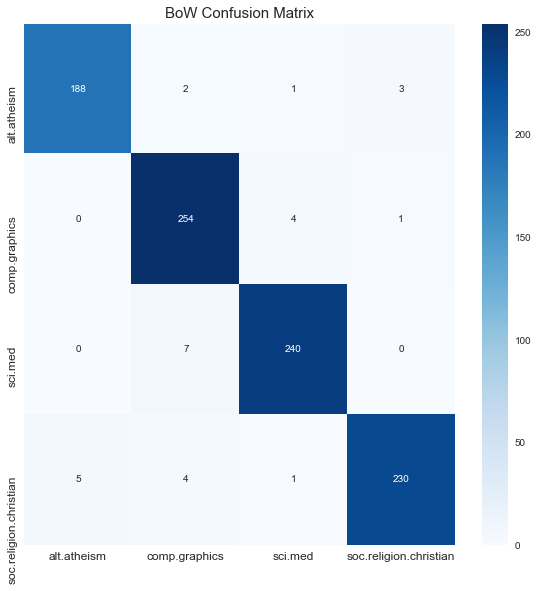

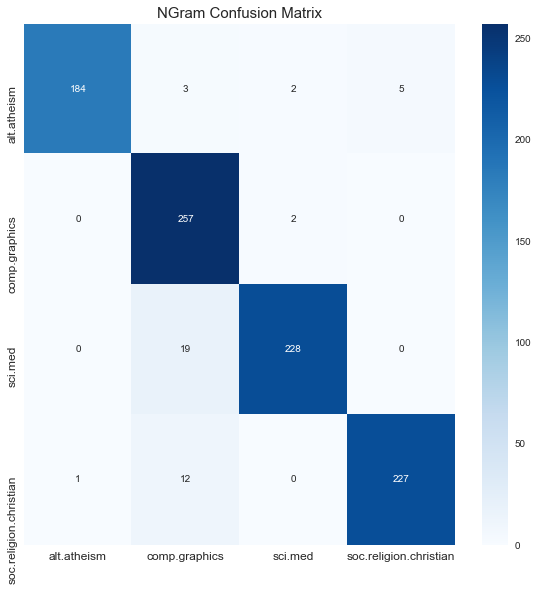

In [39]:
# Confusion Matrix of Bag of Words for Original Values
box_cnf_matrix = metrics.confusion_matrix(y_test, BoW_predictions)
plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(box_cnf_matrix), annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=target_names, yticklabels=target_names);
plt.tight_layout()
plt.title('BoW Confusion Matrix', fontsize=15); 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Confusion Matrix of N-Gram for Original Values
ngram_cnf_matrix = metrics.confusion_matrix(yN_test, NGram_predictions)
plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(ngram_cnf_matrix), annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=target_names, yticklabels=target_names);
plt.tight_layout()
plt.title('NGram Confusion Matrix', fontsize=15); 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Confusion Matrix of BoW and NGram for Normalized Values

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

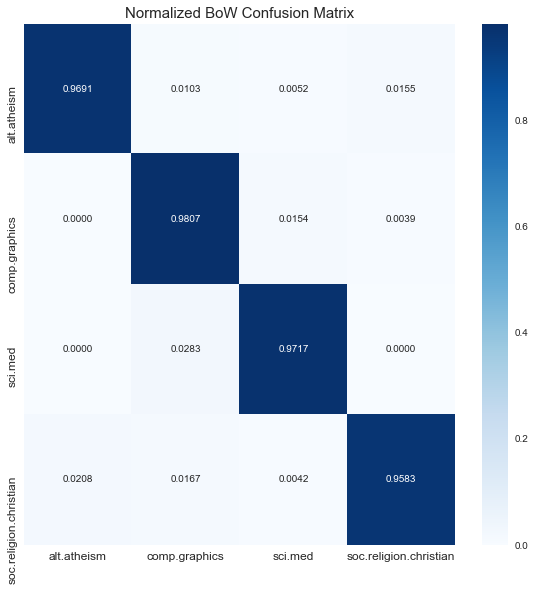

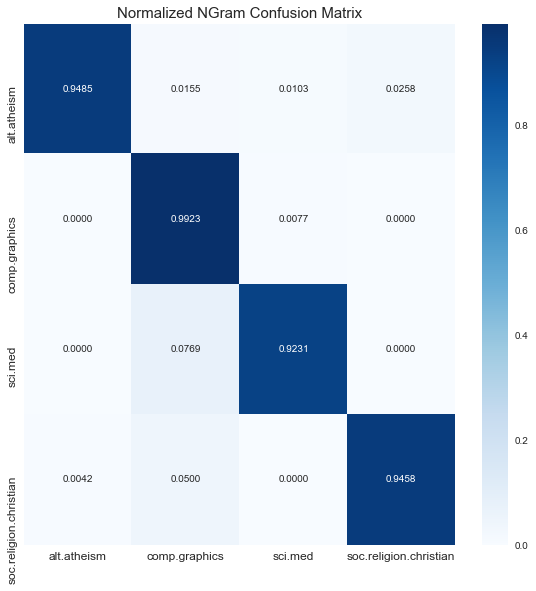

In [40]:
# Confusion Matrix of Bag Of Words for Normalized Values
box_cnf_matrix = metrics.confusion_matrix(y_test, BoW_predictions)
cmn = box_cnf_matrix.astype('float') / box_cnf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(cmn, annot=True, cmap=plt.cm.Blues, fmt='.4f', xticklabels=target_names, yticklabels=target_names);
plt.tight_layout()
plt.title('Normalized BoW Confusion Matrix', fontsize=15); 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Confusion Matrix of N-Gram for Normalized
ngram_cnf_matrix = metrics.confusion_matrix(yN_test, NGram_predictions)
cmNG = ngram_cnf_matrix.astype('float') / ngram_cnf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(cmNG, annot=True, cmap=plt.cm.Blues, fmt='.4f', xticklabels=target_names, yticklabels=target_names);
plt.tight_layout()
plt.title('Normalized NGram Confusion Matrix', fontsize=15); 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Which model was better? Why? Answer in terms of accuracy score and confusion matrix values

**Ans: Looking at the Accuracy Scores, Bag of Words performed much better at predicting the results than NGram.**

**Similarly, the diagonals of the Confusion Matrix of BoW were also larger than the Confusion Matrix of NGram which points to a better performance of BoW as well.**